<a href="https://colab.research.google.com/github/BenjaminLopezLagos/ObjectRecognition/blob/main/ObjectDetectionTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [333]:
!pip install --upgrade opencv-python
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np
cv2.__version__

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


'4.6.0'

In [334]:
frozen_model = '/content/objectRecon/frozen_inference_graph.pb'
config_file = '/content/objectRecon/ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'

In [335]:
model = cv2.dnn_DetectionModel(frozen_model, config_file)

In [336]:
from os import read
classLabels = []
file_name = '/content/objectRecon/labels.txt'
with open(file_name,'rt') as fpt:
  classLabels = fpt.read().rstrip('\n').split('\n')

In [337]:
print(classLabels)

['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'street sign', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'hat', 'backpack', 'umbrella', 'shoe', 'eye glasses', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'plate', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'mirror', 'dining table', 'window', 'desk', 'toilet', 'door', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'blender', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush', 'hair brush']


In [338]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 0x7f4201b196d0>

Reading images:

In [339]:
img = cv2.imread('/content/objectRecon/images/bird_test.jpg')

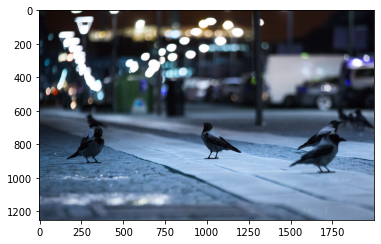

In [340]:
plt.imshow(img)

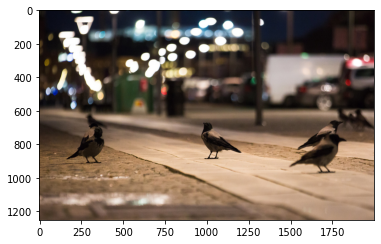

In [341]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [342]:
ClassIndex, confidence, bbox = model.detect(img, confThreshold=0.5)

In [343]:

print(ClassIndex)

[16 16  3  1  3  3  1  3]


In [344]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
  cv2.rectangle(img,boxes,(255,0,0),2)
  cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font, fontScale = font_scale, color = (0,255,0),thickness = 3)

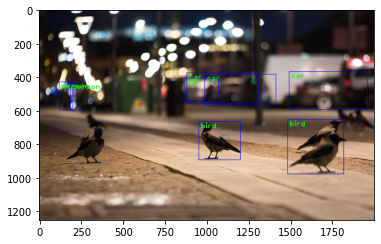

In [345]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))